In [269]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <center> ETL  (Extraer, Transformar y Cargar) </center>

____

In [270]:
#Importar los archivos

data = pd.read_csv('Call_Center.csv', sep=';')
data

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [271]:
#Analisis y limpieza de datos 

data['customer_id'] = data['customer_id'].replace('0', 0.0)

#Identificacion de nulos
def verificar_nulos(tabla):
    for columna in tabla.columns:
        if tabla[columna].isnull().values.any():
            print(f"La columna {columna} contiene valores nulos.")
        else:
            print(f"La columna {columna} no contiene valores nulos.")

verificar_nulos(data) 



La columna vru.line no contiene valores nulos.
La columna call_id no contiene valores nulos.
La columna customer_id no contiene valores nulos.
La columna priority no contiene valores nulos.
La columna type no contiene valores nulos.
La columna date no contiene valores nulos.
La columna vru_entry no contiene valores nulos.
La columna vru_exit no contiene valores nulos.
La columna vru_time no contiene valores nulos.
La columna q_start no contiene valores nulos.
La columna q_exit no contiene valores nulos.
La columna q_time no contiene valores nulos.
La columna outcome no contiene valores nulos.
La columna ser_start no contiene valores nulos.
La columna ser_exit no contiene valores nulos.
La columna ser_time no contiene valores nulos.
La columna server no contiene valores nulos.
La columna startdate no contiene valores nulos.


No se escontraron datos nulos en la tabla

In [272]:
# Identificar valores duplicados en la columna


def verificar_duplicados(columna, datos):
    duplicados = datos[columna].duplicated().any()
    return duplicados


duplicados = verificar_duplicados('call_id', data)
print(duplicados)

True


La columna Call_id debe tener valores unicos pero se encontro que hay valores duplicados

In [273]:
#Exploracion de los datos

print(data.info())

data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

,call_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,2.000000,10.000000,79.000000,185.000000,273.000000
max,55656.000000,2.000000,4832.000000,28693.000000,61437.000000,334.000000


Hay que clasificar el tipo de dato de  las columnas para el analisis

In [274]:
data['vru.line'] = data['vru.line'].astype('str')
data['call_id']   =data['call_id'].astype('str')
data['customer_id']   =data['customer_id'].astype('str')
data['priority']  =data['priority'].astype('category')
data['type']= data['type'].astype('category')
data['outcome']   =data['outcome'].astype('category')
data['server']    =data['server'].astype('category')

#Tiempos y fechas
date_fomat = '%Y-%m-%d %H:%M:%S'

data['date']      =pd.to_datetime(data['date'])
data['vru_entry'] = pd.to_datetime(data['vru_entry'])
data['vru_exit']  =pd.to_datetime(data['vru_exit'])
data['q_start']   =pd.to_datetime(data['q_start'])
data['q_exit']    =pd.to_datetime(data['q_exit'])
data['ser_start'] =pd.to_datetime(data['ser_start'])
data['ser_exit']  =pd.to_datetime(data['ser_exit'])


In [275]:
#Observar los cambios realizados

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,444448,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,1999-07-06 09:55:09.633522944,2023-11-04 14:27:15.241546496,2023-11-04 14:27:25.527627520,10.286081,2023-11-04 08:29:01.435895552,2023-11-04 08:29:48.776293120,59.004304,2023-11-04 11:43:11.602028544,2023-11-04 11:44:47.382784256,152.561776,172.333974
min,1999-01-01 00:00:00,2023-11-04 00:00:01,2023-11-04 00:00:08,-362.000000,2023-11-04 00:00:00,2023-11-04 00:00:00,0.000000,2023-11-04 00:00:00,2023-11-04 00:00:00,0.000000,0.000000
25%,1999-04-11 00:00:00,2023-11-04 10:45:42,2023-11-04 10:45:51,6.000000,2023-11-04 00:00:00,2023-11-04 00:00:00,0.000000,2023-11-04 08:37:01,2023-11-04 08:38:59,12.000000,90.000000
50%,1999-07-06 00:00:00,2023-11-04 14:03:55,2023-11-04 14:04:06,8.000000,2023-11-04 10:01:48,2023-11-04 10:03:29,16.000000,2023-11-04 12:23:49,2023-11-04 12:26:31,84.000000,181.000000
75%,1999-10-07 00:00:00,2023-11-04 17:43:51,2023-11-04 17:44:01,10.000000,2023-11-04 14:57:19.249999872,2023-11-04 14:59:05,79.000000,2023-11-04 16:50:35,2023-11-04 16:52:39.249999872,185.000000,273.000000
max,1999-12-31 00:00:00,2023-11-04 23:59:58,2023-11-04 23:59:59,4832.000000,2023-11-04 23:59:59,2023-11-04 23:59:59,28693.000000,2023-11-04 23:59:58,2023-11-04 23:59:59,61437.000000,334.000000
std,NaN,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [276]:
#Despues del tratamiento de los datos, se procede a crear un call_id unico debido a que esta duplicado

data.insert(1, 'Nuevo_ID_Call', data['vru.line'] + data['call_id'])
data

,vru.line,Nuevo_ID_Call,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,AA010133116,33116,9664491.0,2,PS,1999-01-01,2023-11-04 00:00:31,2023-11-04 00:00:36,5,2023-11-04 00:00:36,2023-11-04 00:03:09,153,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
1,AA0101,AA010133117,33117,0.0,0,PS,1999-01-01,2023-11-04 00:34:12,2023-11-04 00:34:23,11,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
2,AA0101,AA010133118,33118,27997683.0,2,PS,1999-01-01,2023-11-04 06:55:20,2023-11-04 06:55:26,6,2023-11-04 06:55:26,2023-11-04 06:55:43,17,AGENT,2023-11-04 06:55:43,2023-11-04 06:56:37,54,MICHAL,0
3,AA0101,AA010133119,33119,0.0,0,PS,1999-01-01,2023-11-04 07:41:16,2023-11-04 07:41:26,10,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 07:41:25,2023-11-04 07:44:53,208,BASCH,0
4,AA0101,AA010133120,33120,0.0,0,PS,1999-01-01,2023-11-04 08:03:14,2023-11-04 08:03:24,10,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 08:03:23,2023-11-04 08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA021617211,17211,0.0,0,IN,1999-12-31,2023-11-04 13:46:51,2023-11-04 13:47:04,13,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 13:47:03,2023-11-04 13:56:16,553,Z2ELINOR,334
444444,AA0216,AA021617212,17212,0.0,0,IN,1999-12-31,2023-11-04 13:58:31,2023-11-04 13:58:40,9,2023-11-04 13:58:40,2023-11-04 13:59:49,69,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444445,AA0216,AA021617213,17213,0.0,0,IN,1999-12-31,2023-11-04 17:10:51,2023-11-04 17:11:12,21,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444446,AA0216,AA021617214,17214,0.0,0,IN,1999-12-31,2023-11-04 18:30:19,2023-11-04 18:30:54,35,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334


In [277]:
# En el describe se encontro que vru_time hay valores negativos lo cual no deberia ser

porcentaje_de_negativos = round(((data['vru_time'] < 0).sum())/data['vru_time'].count()*100, 2)
porcentaje_de_negativos

# Se encuentra que es un porcentaje muy pequeño, de igual manera deciden reemplazarse por 0 

data['vru_time'] = data['vru_time'].clip(lower=0)


In [278]:
data['vru_time'].describe()
# Ya no hay valores negativos

count    444448.000000
mean         10.341219
std          34.829531
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

# <center> EDA  (Análisis de Datos Exploratorio ) </center>

____

# <center> Analisis de Customer_id <center>

In [279]:
#En el archivo dado se informaba que cuando aparecian 0 en customer_id era porque el sistema no pudo identificar a la persona que realiza la llamada, es importante identificar el  porcentaje que esto representa


Clientes = data['customer_id'].value_counts()
porcentaje = (Clientes / len(data)) * 100
porcentaje

customer_id
0.0           52.773778
58859752.0     0.373722
58704610.0     0.309373
7191646.0      0.284398
52867744.0     0.271573
                ...    
36482305       0.000225
29571775       0.000225
55893531       0.000225
64876170       0.000225
53525267.0     0.000225
Name: count, Length: 19047, dtype: float64

Al rededor del 53% de Customer_id no se pudo identificar 

Analisis de la VRU

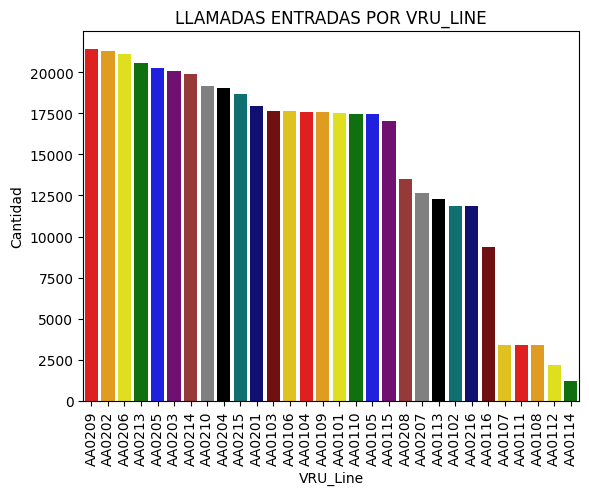

In [280]:

cantidad = data['vru.line'].value_counts()

colores = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "gray", "black", "teal", "navy", "maroon", "gold"]

plt.figure()
sns.barplot(x=cantidad.index, y=cantidad.values, hue=cantidad.index, palette=colores, legend=False)
plt.xticks(rotation=90)
plt.xlabel('VRU_Line')
plt.ylabel('Cantidad')
plt.title('LLAMADAS ENTRADAS POR VRU_LINE')
warnings.filterwarnings("ignore")
plt.show()

A partir del grafico anterior, se puede deducir que la VRU AAO209, AAO202 y AAO206 son las vru donde mas llamadas reciben

#  <center> Analisis de las prioridades de las llamadas <center>

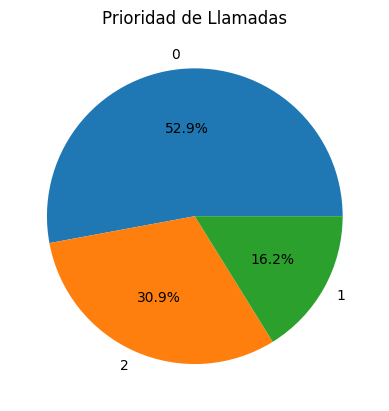

In [281]:
porcentaje=data['priority'].value_counts() / len(data) * 100
round(porcentaje),2


valores = porcentaje.values
etiquetas = porcentaje.index

# Crear el gráfico de torta
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Prioridad de Llamadas')
plt.show()

El 53% de las llamadas tienen prioridad 0, es decir que son clientes no identificados o regulares y el 31% de las llamadas tienen prioridad 2 es decir que son clientes de alta prioridad

 Analisis  de los tipos de servicio

In [282]:

data['type'] = data['type'].str.strip()
data['type'].value_counts()

type
PS    302522
NW     67728
NE     39342
IN     20732
TT     12295
PE      1824
AA         5
Name: count, dtype: int64

In [283]:
porcentaje= round(((data['type'].value_counts() / len(data)) * 100),2)
porcentaje

type
PS    68.07
NW    15.24
NE     8.85
IN     4.66
TT     2.77
PE     0.41
AA     0.00
Name: count, dtype: float64

In [284]:
#Se identifico que el pocentaje de PE y AA no son significantes por lo que se eliminan estas columnas
data.drop(data[data['type'] == 'PE'].index, inplace=True)
data.drop(data[data['type'] == 'AA'].index, inplace=True)

In [285]:
porcentaje= round(((data['type'].value_counts() / len(data)) * 100),2)
porcentaje

type
PS    68.35
NW    15.30
NE     8.89
IN     4.68
TT     2.78
Name: count, dtype: float64

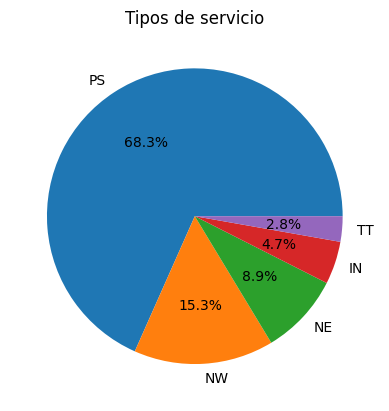

In [286]:
#Grafico de torta para el tipo de servicio

valores = porcentaje.values
categorias = porcentaje.index

plt.pie(porcentaje, labels=categorias, autopct='%1.1f%%')
plt.title('Tipos de servicio')

plt.show()

 Se puede observar que el servicio "Actividad Regular (PS)" fue el mas prestado con un 68% 

# <center> Analisis de date

In [287]:

#Se separa el mes en una columna, para ver el comportamiento de las llamadas mes a mes, se elimina la columna date debido a que ya no es necesaria, no se separo el año porque todos los datos son de


data.insert(5, 'Mes', data['date'].dt.month)
data = data.drop('date', axis=1)

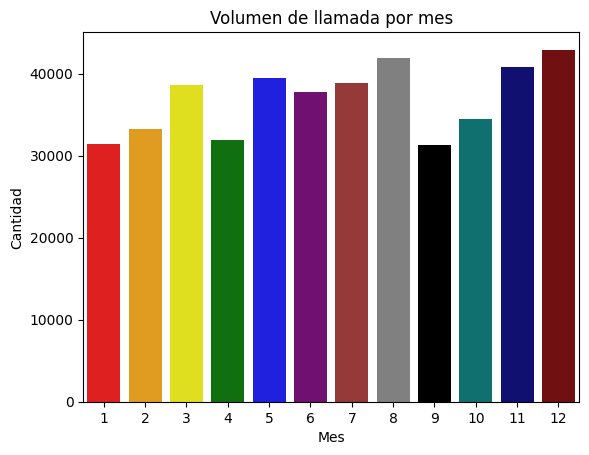

In [288]:
colores = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "gray", "black", "teal", "navy", "maroon"]

plt.figure()
sns.countplot(data=data, x='Mes', palette=colores)

plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Volumen de llamada por mes')
plt.show()

A partir del grafico anterior, se puede concluir que los meses con más llamadas son Agosto, noviembre y diciembre, además los meses con menos llamadas son enero, abril y septiembre

# <center> Analisis de Vru_entry 

In [289]:
#Para realizar el analisis separa la hora y se crea una nueva columna

data.insert(8, 'hora_vru_entry', data['vru_entry'].dt.hour)

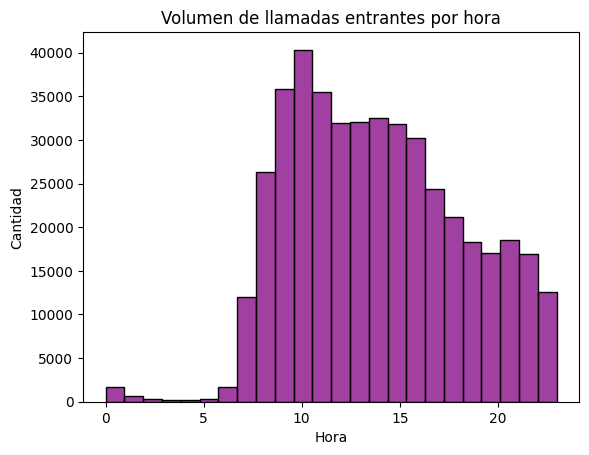

In [290]:
plt.figure()
sns.histplot(data=data, x='hora_vru_entry', bins=24, color= 'purple')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas entrantes por hora')
plt.show()

In [291]:
#Para realizar el analisis separa la hora y se crea una nueva columna

data.insert(10, 'hora_vru_exit', data['vru_exit'].dt.hour)

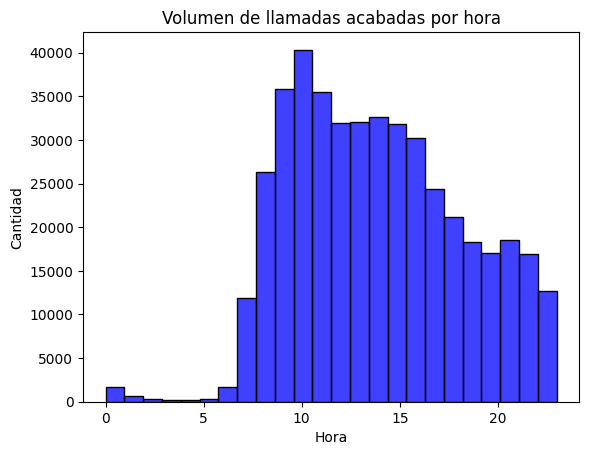

In [292]:
plt.figure()
sns.histplot(data=data, x='hora_vru_exit', bins=24, color= 'blue')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas acabadas por hora')
plt.show()

A partir de los graficos anteriores se puede concluir que entre las  0 y las 6 de la mañana la concurrencia de llamadas es muy baja, mientras que entre las 9 y 11 es donde mas llamadas entran, por ende el comportamiento de salidas de llamadas tiene un comportamiento similar, debido a que depende de las llamadas que entran

# <center> Analisis de vru_time

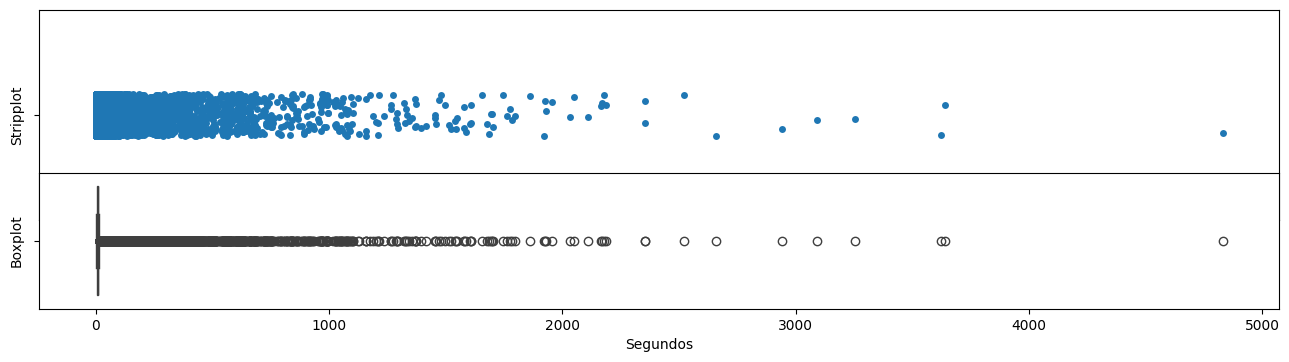

In [293]:
#Se realiza un Stripplot y un Boxplot para ver el comportamiento de los datos, debido a que se habia encontrado valores negativos anteriormente(atipicos)

tamaño_figura = plt.figure(figsize=(16, 6))

gaf1 = tamaño_figura.add_subplot(211)
sns.stripplot(data=data, x='vru_time', ax=gaf1)
gaf1.set_xlabel('Segundos') ; gaf1.set_ylabel('Stripplot')

graf2 = tamaño_figura.add_subplot(312, sharex=gaf1)
sns.boxplot(data=data, x='vru_time', ax=graf2)
graf2.set_xlabel('Segundos') ; graf2.set_ylabel('Boxplot')



plt.tight_layout()

Graficamente se encuentra con valores demasiado grandes a comparacion de otros, es decir existen outliers, despues de los 2000 segundos es donde se evidencia mas la dispersion de los datos, es decir despues de esperar media hora, aunque 30 minutos de espera en la vru es un tiempo alto. 


# Analisis q_start, q_exit y q_time

In [294]:
data.insert(8, 'hora_q_start', data['q_start'].dt.hour)
data.insert(8, 'hora_q_exit', data['q_exit'].dt.hour)

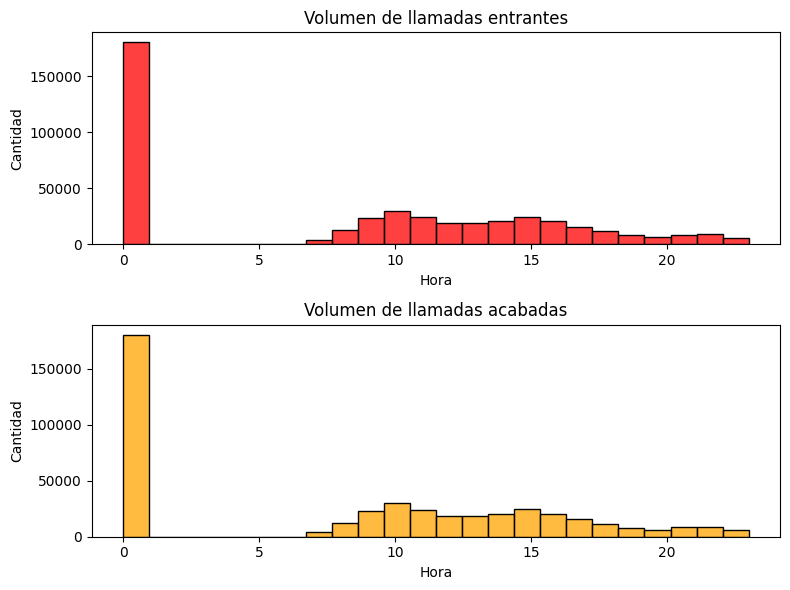

In [295]:
#vemos el comportamiento de q_start y q_exit

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Trazar el primer histograma en el primer subplot
sns.histplot(data=data, x='hora_q_start', bins=24, color='red', ax=ax1)
ax1.set_xlabel('Hora')
ax1.set_ylabel('Cantidad')
ax1.set_title('Volumen de llamadas entrantes')

# Trazar el segundo histograma en el segundo subplot
sns.histplot(data=data, x='hora_q_exit', bins=24, color='orange', ax=ax2)
ax2.set_xlabel('Hora')
ax2.set_ylabel('Cantidad')
ax2.set_title('Volumen de llamadas acabadas')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

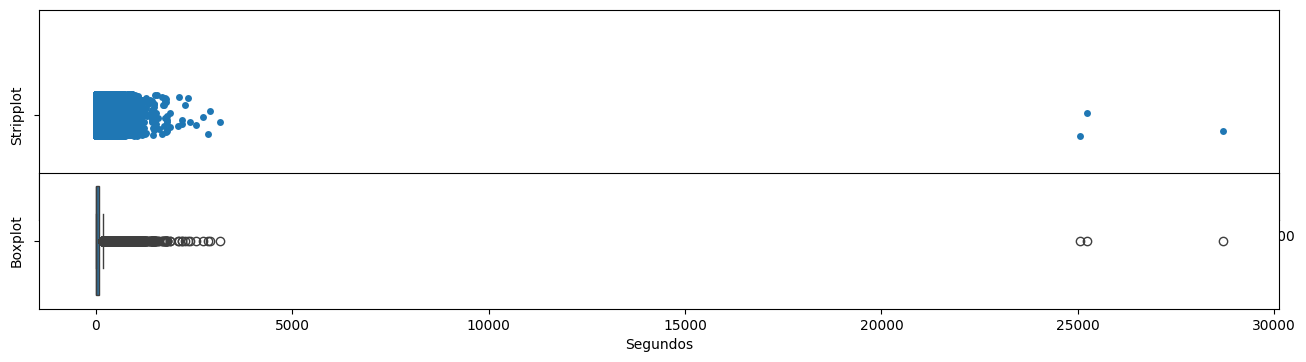

In [296]:
#Vemos el comportamiento del tiempo en cola 

tamaño_figura = plt.figure(figsize=(16, 6))
gaf1 = tamaño_figura.add_subplot(211)
graf2 = tamaño_figura.add_subplot(312, sharex=gaf1)


sns.stripplot(data=data, x='q_time', ax=gaf1)
gaf1.set_xlabel('Segundos')
gaf1.set_ylabel('Stripplot')


sns.boxplot(data=data, x='q_time', ax=graf2)
graf2.set_xlabel('Segundos')
graf2.set_ylabel('Boxplot')


plt.tight_layout()
plt.show()

In [297]:
#Eliminamos el valor atipico mostrados en el grafico

data.drop(data[data['q_time'] > 1000].index, inplace=True)

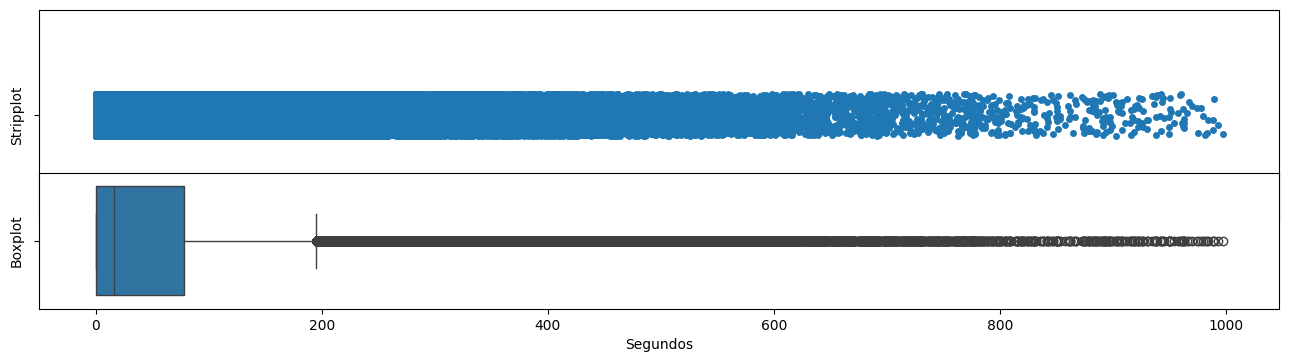

In [298]:

tamaño_figura = plt.figure(figsize=(16, 6))
gaf1 = tamaño_figura.add_subplot(211)
graf2 = tamaño_figura.add_subplot(312, sharex=gaf1)


sns.stripplot(data=data, x='q_time', ax=gaf1)
gaf1.set_xlabel('Segundos')
gaf1.set_ylabel('Stripplot')


sns.boxplot(data=data, x='q_time', ax=graf2)
graf2.set_xlabel('Segundos')
graf2.set_ylabel('Boxplot')


plt.tight_layout()
plt.show()

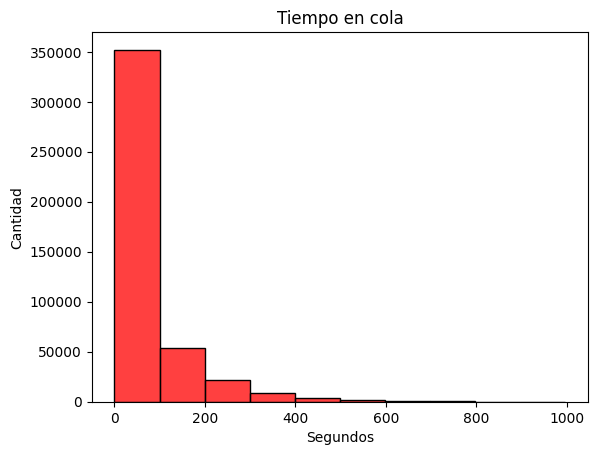

In [299]:
plt.figure()
sns.histplot(data=data, x='q_time', bins=10, color= 'red')
plt.xlabel('Segundos')
plt.ylabel('Cantidad')
plt.title('Tiempo en cola')
plt.show()

Se observa que el mayor porcentaje de llamadas duran menos de 100 segundos en cola, es importante conocer el numero de personas que pasa 0 segndos en cola, es decir que no esperan sino que cuelgan la llamada

In [300]:
#Se calculo el % de personas que no esperan
Porcentaje_personas_no_esperan = round(((data['q_time'] == 0).sum())/data['q_time'].count()*100, 2)
Porcentaje_personas_no_esperan

40.81

 El 40.83% de las personas no entran a cola en el vru, es decir no esperan

#  Analisis de Outcome

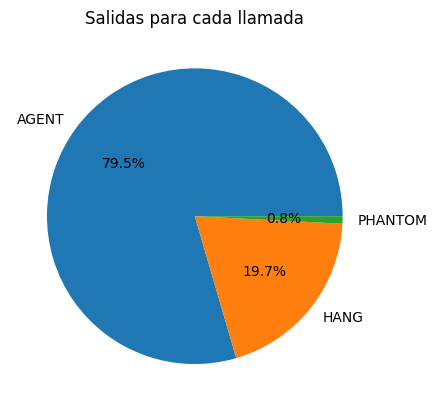

In [301]:
#Como hay 3 categorias se inspecciona el % que lleva cada una en las llamdas

porcentaje= round(((data['outcome'].value_counts() / len(data)) * 100),2)


valores = porcentaje.values
etiquetas = porcentaje.index

# Crear el gráfico de torta
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Salidas para cada llamada')
plt.show()

El 79% de las llamadas fueron atendidas por un agente y se le brindo el servicio, cerca del 20% de las llamadas fueron cortadas y no se les pudo dar servicio mientras que cerca del 1% de las llamadas no se sabe lo que sucedio

# Analisis de ser_start, ser_exit y ser_time

In [302]:
data.insert(8, 'hora_ser_start', data['ser_start'].dt.hour)
data.insert(8, 'hora_ser_exit', data['ser_exit'].dt.hour)

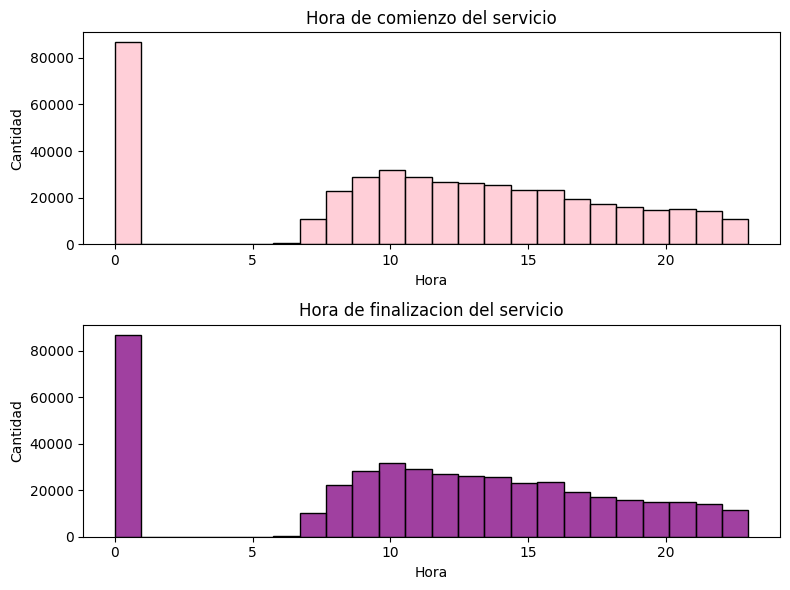

In [303]:
#vemos el comportamiento de q_start y q_exit

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Trazar el primer histograma en el primer subplot
sns.histplot(data=data, x='hora_ser_start', bins=24, color='pink', ax=ax1)
ax1.set_xlabel('Hora')
ax1.set_ylabel('Cantidad')
ax1.set_title('Hora de comienzo del servicio')

# Trazar el segundo histograma en el segundo subplot
sns.histplot(data=data, x='hora_ser_exit', bins=24, color='purple', ax=ax2)
ax2.set_xlabel('Hora')
ax2.set_ylabel('Cantidad')
ax2.set_title('Hora de finalizacion del servicio')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

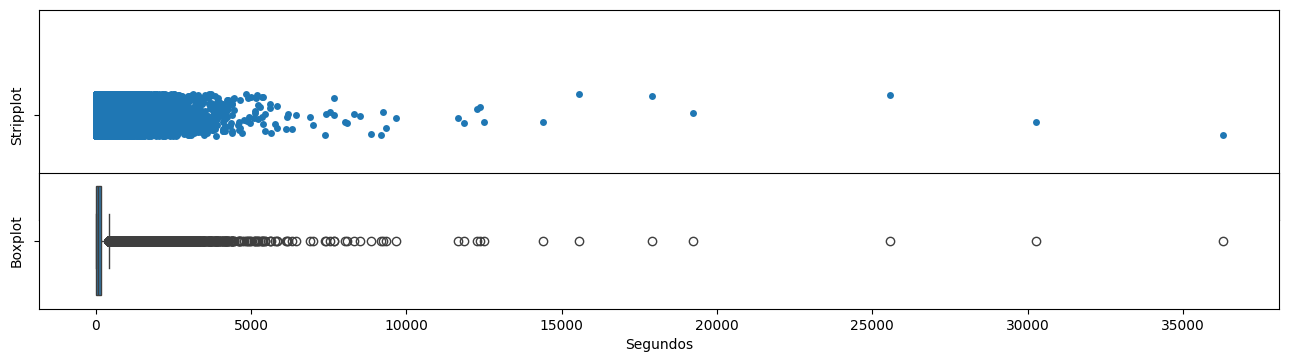

In [304]:
#Vemos el comportamiento del tiempo en servicio

tamaño_figura = plt.figure(figsize=(16, 6))
gaf1 = tamaño_figura.add_subplot(211)
graf2 = tamaño_figura.add_subplot(312, sharex=gaf1)


sns.stripplot(data=data, x='ser_time', ax=gaf1)
gaf1.set_xlabel('Segundos')
gaf1.set_ylabel('Stripplot')


sns.boxplot(data=data, x='ser_time', ax=graf2)
graf2.set_xlabel('Segundos')
graf2.set_ylabel('Boxplot')


plt.tight_layout()
plt.show()

Con base al grafico se puede deducir que los valores por encima de 10000 segundos se consideran outliers, debido a que no respresentan muchos valores

In [305]:
#Eliminamos el valor atipico

data.drop(data[data['ser_time'] > 10000].index, inplace=True)

Se vuelve a graficar despues de elimnar outliers

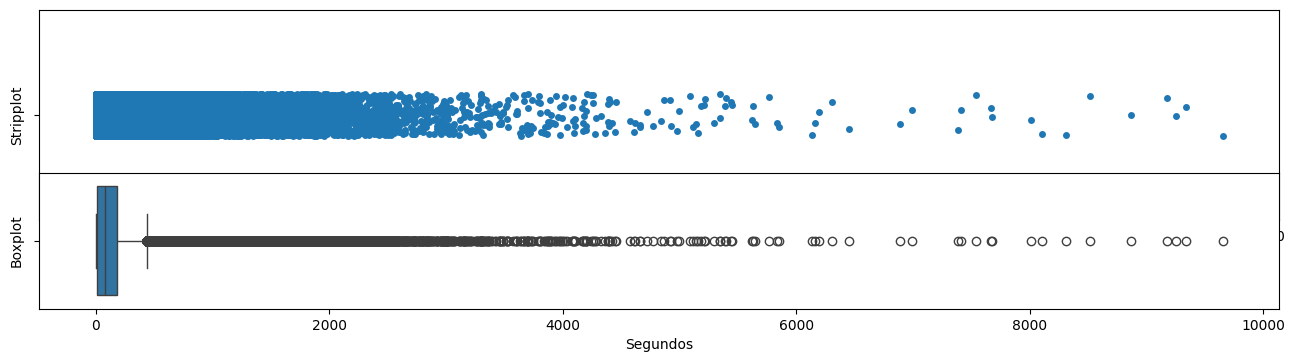

In [306]:
tamaño_figura = plt.figure(figsize=(16, 6))
gaf1 = tamaño_figura.add_subplot(211)
graf2 = tamaño_figura.add_subplot(312, sharex=gaf1)


sns.stripplot(data=data, x='ser_time', ax=gaf1)
gaf1.set_xlabel('Segundos')
gaf1.set_ylabel('Stripplot')


sns.boxplot(data=data, x='ser_time', ax=graf2)
graf2.set_xlabel('Segundos')
graf2.set_ylabel('Boxplot')


plt.tight_layout()
plt.show()

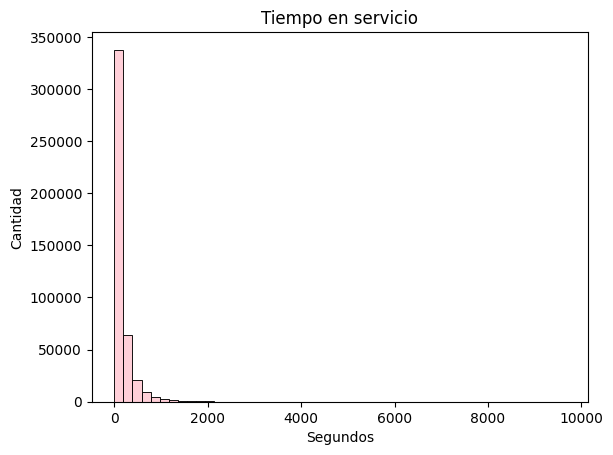

In [307]:
plt.figure()
sns.histplot(data=data, x='ser_time', bins=50, color= 'pink')
plt.xlabel('Segundos')
plt.ylabel('Cantidad')
plt.title('Tiempo en servicio')
plt.show()

In [308]:
#Se calculo el % de personas que no esperan
Porcentaje_personas_con_0_seg = round(((data['ser_time'] == 0).sum())/data['q_time'].count()*100, 2)
Porcentaje_personas_con_0_seg

19.71

In [309]:
data['ser_time'].describe()

count    442467.000000
mean        151.765153
std         242.522403
min           0.000000
25%          12.000000
50%          84.000000
75%         184.000000
max        9656.000000
Name: ser_time, dtype: float64

Cerca del 20% de las llamadas duran 0 segundos, ademas el 75% de las llamadas tienen un tiempo en servicio de 3 minutos, lo cual es un buen tiempo.

# Analisis de Server

<Axes: xlabel='server'>

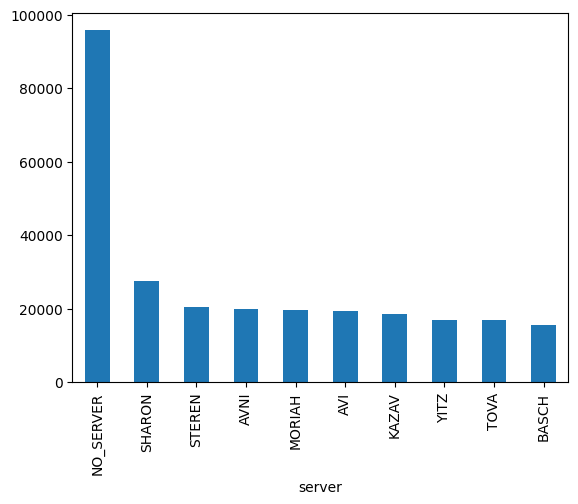

In [310]:
value_counts = data['server'].value_counts()
top_10 = value_counts.head(10)
top_10.plot(kind='bar')

In [311]:
porcentaje_no_server=((data['server'] == 'NO_SERVER').sum())/(len(data['server']))
porcentaje_no_server

0.21653366239742172

Se observa que hay un alto numero de llamadas NO_ SERVER, al realizar el porcentaje se encuentra que cerca del 21% de las llamadas tienen esta particularidad, se procede a mirar que prioridad tienen estas llamadas para determinar si se pueden borrar o no estas filas

In [312]:
no_server = data[data['server'] == 'NO_SERVER']
no_server

,vru.line,Nuevo_ID_Call,call_id,customer_id,priority,Mes,type,vru_entry,hora_ser_exit,hora_ser_start,...,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,AA010133116,33116,9664491.0,2,1,PS,2023-11-04 00:00:31,0,0,...,5,2023-11-04 00:00:36,2023-11-04 00:03:09,153,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
1,AA0101,AA010133117,33117,0.0,0,1,PS,2023-11-04 00:34:12,0,0,...,11,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
18,AA0101,AA010133134,33134,0.0,0,1,PS,2023-11-04 11:07:30,11,11,...,8,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 11:07:43,2023-11-04 11:07:46,3,NO_SERVER,0
25,AA0101,AA010133141,33141,27347905.0,1,1,PS,2023-11-04 13:12:08,0,0,...,5,2023-11-04 13:12:13,2023-11-04 13:14:05,112,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
28,AA0101,AA010133144,33144,0.0,0,1,PS,2023-11-04 14:07:17,0,0,...,17,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444442,AA0216,AA021617210,17210,0.0,0,12,IN,2023-11-04 13:26:23,0,0,...,10,2023-11-04 13:26:33,2023-11-04 13:27:26,53,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444444,AA0216,AA021617212,17212,0.0,0,12,IN,2023-11-04 13:58:31,0,0,...,9,2023-11-04 13:58:40,2023-11-04 13:59:49,69,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444445,AA0216,AA021617213,17213,0.0,0,12,IN,2023-11-04 17:10:51,0,0,...,21,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444446,AA0216,AA021617214,17214,0.0,0,12,IN,2023-11-04 18:30:19,0,0,...,35,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334


In [313]:
count = data[data['priority'] == 2].shape[0]

print("Número de filas con el valor 2:", count)

Número de filas con el valor 2: 136870


Se observa que 136870 filas tienen prioridad 2 entonces, no se borran

In [314]:
data

,vru.line,Nuevo_ID_Call,call_id,customer_id,priority,Mes,type,vru_entry,hora_ser_exit,hora_ser_start,...,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,AA010133116,33116,9664491.0,2,1,PS,2023-11-04 00:00:31,0,0,...,5,2023-11-04 00:00:36,2023-11-04 00:03:09,153,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
1,AA0101,AA010133117,33117,0.0,0,1,PS,2023-11-04 00:34:12,0,0,...,11,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,0
2,AA0101,AA010133118,33118,27997683.0,2,1,PS,2023-11-04 06:55:20,6,6,...,6,2023-11-04 06:55:26,2023-11-04 06:55:43,17,AGENT,2023-11-04 06:55:43,2023-11-04 06:56:37,54,MICHAL,0
3,AA0101,AA010133119,33119,0.0,0,1,PS,2023-11-04 07:41:16,7,7,...,10,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 07:41:25,2023-11-04 07:44:53,208,BASCH,0
4,AA0101,AA010133120,33120,0.0,0,1,PS,2023-11-04 08:03:14,8,8,...,10,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 08:03:23,2023-11-04 08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA021617211,17211,0.0,0,12,IN,2023-11-04 13:46:51,13,13,...,13,2023-11-04 00:00:00,2023-11-04 00:00:00,0,AGENT,2023-11-04 13:47:03,2023-11-04 13:56:16,553,Z2ELINOR,334
444444,AA0216,AA021617212,17212,0.0,0,12,IN,2023-11-04 13:58:31,0,0,...,9,2023-11-04 13:58:40,2023-11-04 13:59:49,69,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444445,AA0216,AA021617213,17213,0.0,0,12,IN,2023-11-04 17:10:51,0,0,...,21,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334
444446,AA0216,AA021617214,17214,0.0,0,12,IN,2023-11-04 18:30:19,0,0,...,35,2023-11-04 00:00:00,2023-11-04 00:00:00,0,HANG,2023-11-04 00:00:00,2023-11-04 00:00:00,0,NO_SERVER,334


A traves del eda no se borraron algunas columnas que se usaron para crear otras y no fueron usadas, para dejar el dataframe totalmente limpio se proceden a borrar 

In [315]:
data = data.drop('call_id', axis=1)
data = data.drop('vru_entry', axis=1)
data = data.drop('vru_exit', axis=1)
data = data.drop('q_start', axis=1)
data = data.drop('q_exit', axis=1)
data = data.drop('ser_start', axis=1)
data= data.drop('ser_exit', axis=1)
data= data.drop('startdate', axis=1)

In [316]:
data

,vru.line,Nuevo_ID_Call,customer_id,priority,Mes,type,hora_ser_exit,hora_ser_start,hora_q_exit,hora_q_start,hora_vru_entry,hora_vru_exit,vru_time,q_time,outcome,ser_time,server
0,AA0101,AA010133116,9664491.0,2,1,PS,0,0,0,0,0,0,5,153,HANG,0,NO_SERVER
1,AA0101,AA010133117,0.0,0,1,PS,0,0,0,0,0,0,11,0,HANG,0,NO_SERVER
2,AA0101,AA010133118,27997683.0,2,1,PS,6,6,6,6,6,6,6,17,AGENT,54,MICHAL
3,AA0101,AA010133119,0.0,0,1,PS,7,7,0,0,7,7,10,0,AGENT,208,BASCH
4,AA0101,AA010133120,0.0,0,1,PS,8,8,0,0,8,8,10,0,AGENT,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA021617211,0.0,0,12,IN,13,13,0,0,13,13,13,0,AGENT,553,Z2ELINOR
444444,AA0216,AA021617212,0.0,0,12,IN,0,0,13,13,13,13,9,69,HANG,0,NO_SERVER
444445,AA0216,AA021617213,0.0,0,12,IN,0,0,0,0,17,17,21,0,HANG,0,NO_SERVER
444446,AA0216,AA021617214,0.0,0,12,IN,0,0,0,0,18,18,35,0,HANG,0,NO_SERVER


Al tener la tabla necesario, se guarda en un archivo csv para llevarlo a power bi

In [318]:
data.to_csv('Data_limpia.csv', index=False)
